In [ ]:
import os
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

In [55]:
import h5py
import time
import mmap
import zarr
import numpy as np


data = np.random.random((int(1e8),))

In [56]:
avg = []
for i in range(5):
    f = h5py.File('/tmp/myfile.hdf5','w')
    
    tic = time.time()
    f['datasets'] = data
    toc = time.time()

    avg.append(toc - tic)
    f.close()
    
print(np.array(avg).mean())

0.353014612197876


In [64]:
avg = []
for i in range(5):
    z1 = zarr.open('/tmp/myfile.zarr', mode='w', shape=data.shape)
    tic = time.time()
    z1[:] = data
    toc = time.time()
    avg.append(toc - tic)
    
print(np.array(avg).mean())

0.5963390350341797


In [58]:
avg = []
for i in range(5):
    mmap = np.memmap("/tmp/myfile.mmap", mode='w+', dtype=np.float32,  shape=data.shape)
    tic = time.time()
    mmap = data
    toc = time.time()
    avg.append(toc - tic)
    
print(np.array(avg).mean())

3.8242340087890626e-05


In [59]:
avg = []
for i in range(5):
    with open("/tmp/myfile.txt", "wb") as f:
        tic = time.time()
        f.write(data)
        toc = time.time()
        avg.append(toc - tic)
print(np.array(avg).mean())

0.3363489627838135


In [62]:
import mmap

avg = []
for i in range(5):
    with open("/tmp/myfile_.txt", "wb") as f:
        f.write(data)
    with open("/tmp/myfile_.txt", "r+b") as f:
        # memory-map the file, size 0 means whole file
        tic = time.time()
        mm = mmap.mmap(f.fileno(), 0)
        toc = time.time()
        avg.append(toc - tic)
    
print(np.array(avg).mean())

7.987022399902344e-05


In [ ]:
# ls -lh /tmp/myfile*.*

In [ ]:
# h5py is much slower to write but much faster to read than numpy.memmap
# numpy.memmap is faster to write but much slower to read than h5py

In [50]:
# np.random.seed(42)

# Reproducible Results

In [51]:
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

kf = StratifiedKFold(n_splits=2)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = RandomForestClassifier(max_depth=2)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    print(classification_report(y_test, y_pred, target_names=target_names))
    # print("Accuracy", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.92      0.88      0.90        25
   virginica       0.88      0.92      0.90        25

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.96      0.96      0.96        25
   virginica       0.96      0.96      0.96        25

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

kf = StratifiedKFold(n_splits=2)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = RandomForestClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.9333333333333333
Accuracy 0.9733333333333334


# 8 characters colision

In [41]:
import tempfile

print(tempfile.TemporaryDirectory())

<TemporaryDirectory '/tmp/tmp0u4dmfbx'>


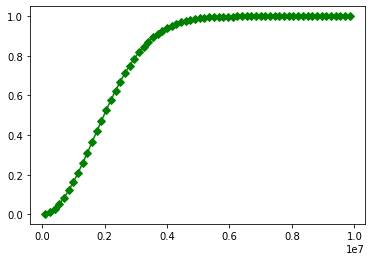

In [66]:
import matplotlib.pyplot as plt

d = 36**8
n_sequence = list(range(10**5, 10**7, 150000))

result = []
for n in n_sequence:
    result.append(1 - ((d-1)/d)**(n*(n-1)/2))

plt.plot(n_sequence, result, '-gD')